# Exploratory Data Analysis - Retail

Performer- Naman Sahu

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
import plotly.offline as plot_off 
import plotly.graph_objects as plot_graph

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv("/content/drive/MyDrive/data/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#dropping unuseful coulmns
df.drop("Postal Code",axis=1,inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
cols = df.select_dtypes(include=["object", "float64", "int64"]).columns
cols

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
for col in df[cols]:
  print(col)
  print(df[col].unique())

Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment
['Consumer' 'Corporate' 'Home Office']
Country
['United States']
City
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morris

# Data Visualisation

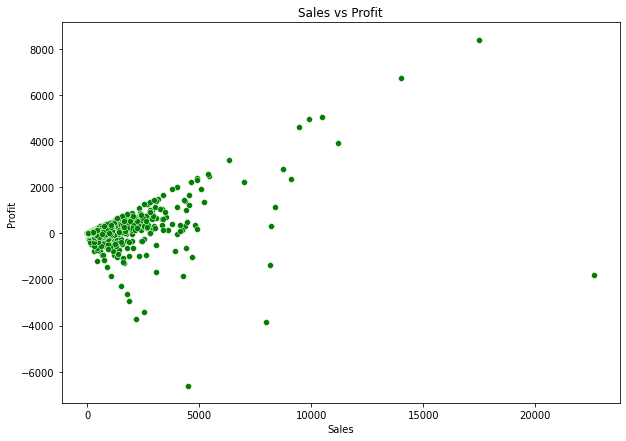

In [11]:
plt.figure(figsize=(10,7))
plt.title("Sales vs Profit")
sns.scatterplot(x=df["Sales"],y=df["Profit"],color='green')
plt.show()

As per the nature of economic behaviour when the sales goes down, profit goes down too and viceversa. Similarly with the above graph we can suggest and infer that more sales heps to gain more profit.

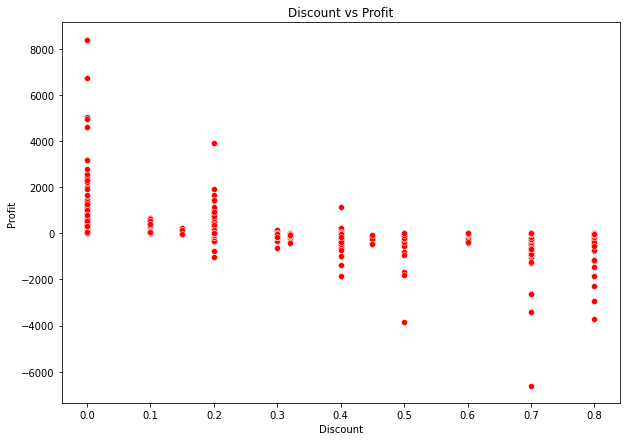

In [12]:
plt.figure(figsize=(10,7))
plt.title("Discount vs Profit")
sns.scatterplot(x=df["Discount"],y=df["Profit"],color='red')
plt.show()

Let's visualize Shipping mode 

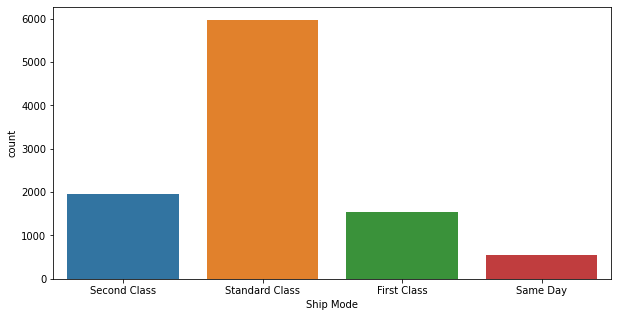

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Ship Mode", data = df)
plt.show()

Quicker the service better is the outcome.
which is exactly reflecting in the graph. However, Profit gain is more in case of standard delivery. Which suggests business should focuses more on standard Class.

Let's explore the 'Statewise' trend.

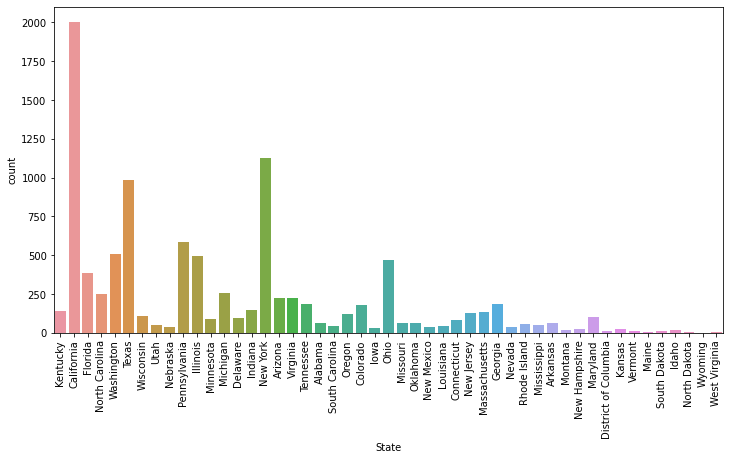

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x="State", data = df)
plt.xticks(rotation = (90))
plt.show()

This graph helps us infer that the companies products are getting sold more in 'California', 'Texas', 'Pennsylvania', 'Illinois', 'New York', 'Ohio' states as compare to all other State.
Which is helping the business to focus more in these states selling and gain more and more profit.


Let's explore 'Segment' trend of sales

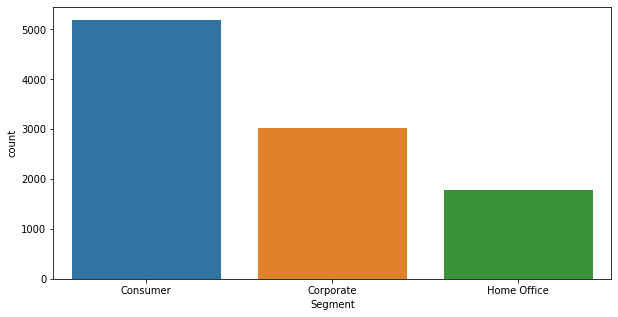

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Segment", data = df)
plt.show()

Consumer has more interest in order to buy more products as compare to other two segment.
Hence business should focus more on goods quality when it comes to sale it to the consumer segment.
in order to maintain and increase the sale with consumer segment.


Let's explore 'Region' wise trend

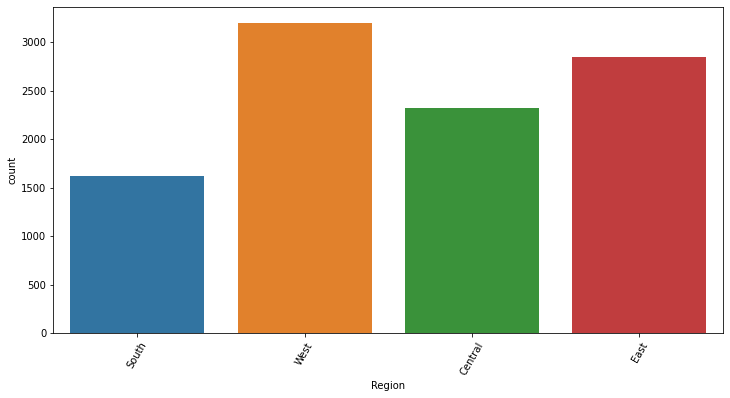

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x="Region", data = df)
plt.xticks(rotation = (60))
plt.show()

'West' and 'East' regions are inclining towards buying more products as compare to 'South' and 'Central'.
Company should focuses more on it's quality in these regions and make stratergy to maintain the profit.

Let's explore 'Category' wise

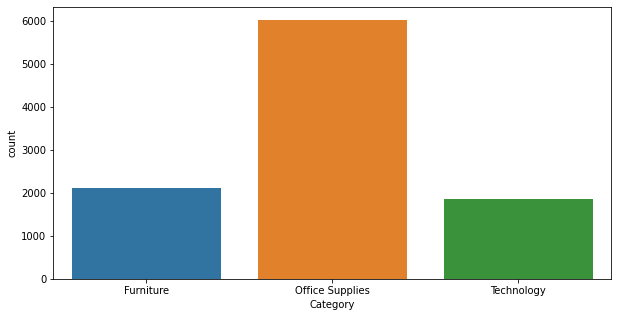

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Category", data = df)
plt.show()

Developed states inclined towards technology hence as per the trend we can see that 'office supplies category' has more profit than other category.

Lets Explose "Sub-Category" wise Trend

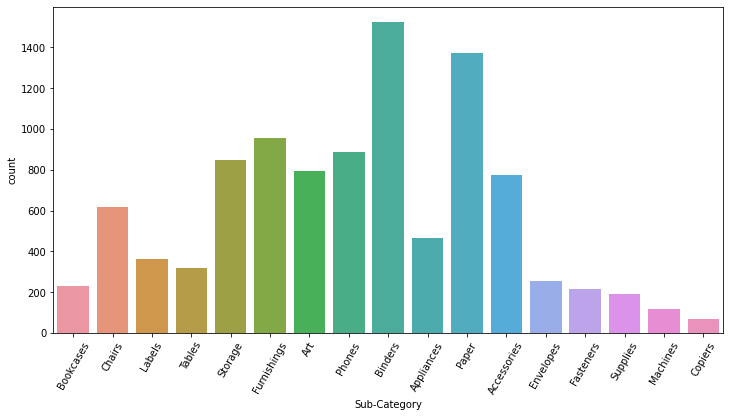

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="Sub-Category", data = df)
plt.xticks(rotation = (60))
plt.show()

As can see in the graph 'office supply goods' having more sale as compare to other products.
However, company should focuses on these products.

# Conclusion

Product Purchase is more in united States as compare to any other region, which defines company should focuses more into expanding their business in these states and focuses more on qualities of product, in order to gain more profit.

# End of Task 3